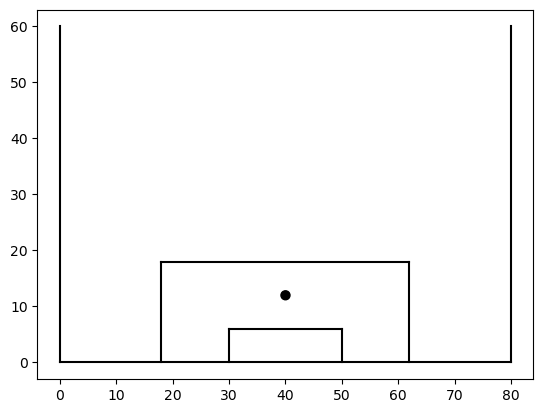

In [1]:
#The basics
import pandas as pd
import numpy as np
import json

#Xg MODEL
from expectedGoal import xG

#Plotting
import matplotlib.pyplot as plt
import FCPython 

#Statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('crossData.csv')

In [4]:
#plot only successful crosses
dataS = data[data['Successful']==1]
dataG = data[data['Goal']==1]
#plotting only high expected goals
minXG = 0.2
dataxG = data[(data['xG']>minXG) | (data['Goal']==1)]
#make histogram of start crosses
H_Cross_startS = np.histogram2d(dataS['Y1']/100*pitchWidthY, dataS['X1']/100*pitchLengthX,bins=50,range=[[0, pitchWidthY],[0, pitchLengthX]])
H_Cross_startG = np.histogram2d(dataG['Y1']/100*pitchWidthY, dataG['X1']/100*pitchLengthX,bins=50,range=[[0, pitchWidthY],[0, pitchLengthX]])
H_Cross_startxG = np.histogram2d(dataxG['Y1']/100*pitchWidthY, dataxG['X1']/100*pitchLengthX,bins=50,range=[[0, pitchWidthY],[0, pitchLengthX]])
H_Cross_end = np.histogram2d(dataS['Y2']/100*pitchWidthY, dataS['X2']/100*pitchLengthX,bins=50,range=[[0, pitchWidthY],[0, pitchLengthX]])


In [6]:
dataG

,Unnamed: 0,Successful,X,Y,matchId,matchPeriod,Sec,X1,Y1,C,X2,Y2,Distance,Angle,Corner,Goal,high,inverted,xG
20,1046,0,NaN,NaN,1694390.0,2H,714.929807,18.0,92.0,42.0,100.0,100.0,33.203915,18.555911,0.0,1.0,1.0,1.0,0.000000
83,3785,1,NaN,NaN,1694392.0,1H,2278.539100,4.0,69.0,19.0,11.0,232.0,13.044635,47.619693,0.0,1.0,1.0,0.0,0.013652
141,6192,1,NaN,NaN,1694393.0,2H,2650.660856,28.0,91.0,41.0,11.0,50.0,39.681009,13.186448,0.0,1.0,1.0,0.0,0.008848
182,8502,0,NaN,NaN,1694395.0,1H,2573.814662,17.0,88.0,38.0,0.0,100.0,30.474785,20.354408,0.0,1.0,1.0,0.0,0.000000
234,12274,1,NaN,NaN,1694397.0,2H,2773.384444,27.0,169.0,119.0,10.0,56.0,82.381703,7.486203,0.0,1.0,1.0,0.0,0.005895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62107,3237779,1,NaN,NaN,2500090.0,2H,1443.043465,5.0,187.0,137.0,8.0,55.0,89.204624,7.068490,0.0,1.0,0.0,0.0,0.006651
62120,3238840,1,NaN,NaN,2500091.0,1H,2250.387848,9.0,205.0,155.0,3.0,52.0,101.192218,6.239872,0.0,1.0,0.0,1.0,0.008798
62158,3240651,1,NaN,NaN,2500092.0,1H,2374.383199,13.0,130.0,80.0,9.0,247.0,53.761720,11.790947,0.0,1.0,1.0,0.0,0.010097
62303,3249139,1,NaN,NaN,2500097.0,2H,215.593916,10.0,74.0,24.0,5.0,244.0,18.804521,35.779362,0.0,1.0,0.0,0.0,0.011688


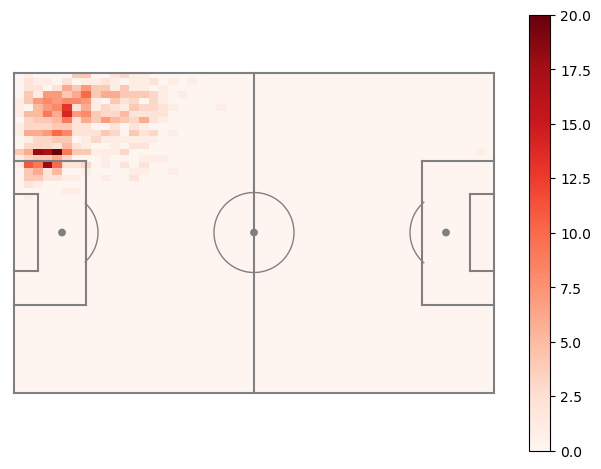

In [5]:
#plot all crosses
pitchLengthX=120
pitchWidthY=80

#make histogram of start crosses
H_Cross_start = np.histogram2d(data['Y1']/100*pitchWidthY, data['X1']/100*pitchLengthX,bins=50,range=[[0, pitchWidthY],[0, pitchLengthX]])
#H_Cross_end = np.histogram2d(data['Y2']/100*pitchWidthY, data['X2']/100*pitchLengthX,bins=50,range=[[0, pitchWidthY],[0, pitchLengthX]])

from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
pos=ax.imshow(H_Cross_startxG[0], extent=[0,120,0,80], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
#ax.set_title('Danger passes per match by ' + team_required)
plt.xlim((-1,121))
plt.ylim((83,-3))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


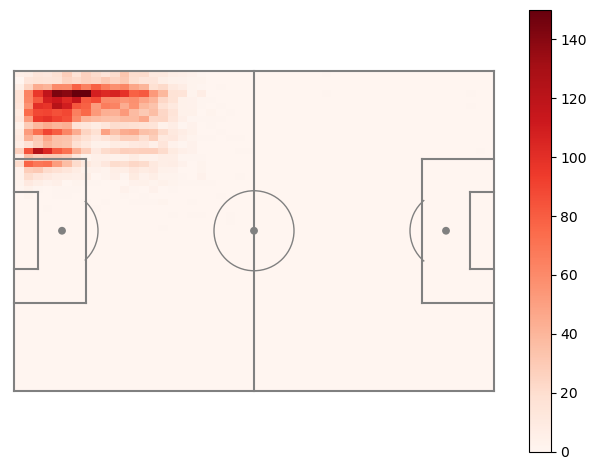

In [25]:

from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
pos=ax.imshow(H_Cross_startS[0], extent=[0,120,0,80], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
#ax.set_title('Danger passes per match by ' + team_required)
plt.xlim((-1,121))
plt.ylim((83,-3))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

/tmp/ipykernel_6028/1968266636.py:3: RuntimeWarning: invalid value encountered in divide
  pos=ax.imshow(H_Cross_startxG[0]/H_Cross_startS[0], extent=[0,120,0,80], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.5)


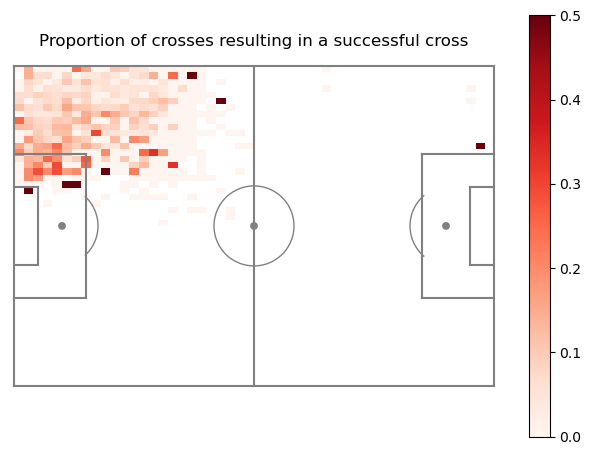

In [41]:
#Plot the probability of scoring from a successful cross
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
pos=ax.imshow(H_Cross_startxG[0]/H_Cross_startS[0], extent=[0,120,0,80], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.5)
fig.colorbar(pos, ax=ax)
ax.set_title('Proportion of crosses resulting in a successful cross')
plt.xlim((-1,121))
plt.ylim((83,-3))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [50]:
data['minXG'] = (data['xG'] > 0.2) | (data['Goal'] == 1)

In [51]:
data

,Unnamed: 0,Successful,X,Y,matchId,matchPeriod,Sec,X1,Y1,C,X2,Y2,Distance,Angle,Corner,Goal,high,inverted,xG,minXG
0,135,0,NaN,NaN,1694390.0,1H,472.444635,5.0,89.0,39.0,17.0,100.0,25.887932,24.480421,0.0,0.0,1.0,0.0,0.000000,False
1,169,1,NaN,NaN,1694390.0,1H,597.062020,12.0,163.0,113.0,4.0,217.0,74.522899,8.486167,0.0,0.0,1.0,0.0,0.022969,False
2,233,0,NaN,NaN,1694390.0,1H,780.492243,13.0,190.0,140.0,19.0,172.0,92.018055,6.862734,0.0,0.0,0.0,0.0,0.000000,False
3,246,1,NaN,NaN,1694390.0,1H,812.281441,10.0,89.0,39.0,13.0,247.0,27.438522,23.629342,0.0,0.0,0.0,0.0,0.008829,False
4,279,0,NaN,NaN,1694390.0,1H,900.362734,5.0,118.0,68.0,100.0,100.0,44.510701,14.185769,0.0,0.0,0.0,0.0,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62328,3250972,0,NaN,NaN,2500098.0,2H,1482.329472,29.0,181.0,131.0,14.0,61.0,90.430775,6.810485,0.0,0.0,1.0,0.0,0.000000,False
62329,3251044,1,NaN,NaN,2500098.0,2H,1809.230004,7.0,84.0,34.0,9.0,57.0,23.290180,27.774270,0.0,0.0,0.0,0.0,0.005618,False
62330,3251133,1,NaN,NaN,2500098.0,2H,2079.858095,10.0,75.0,25.0,9.0,124.0,19.347157,34.631070,0.0,0.0,1.0,0.0,0.207503,True
62331,3251240,0,NaN,NaN,2500098.0,2H,2642.981466,14.0,94.0,44.0,12.0,71.0,32.156648,19.831082,0.0,0.0,0.0,0.0,0.000000,False


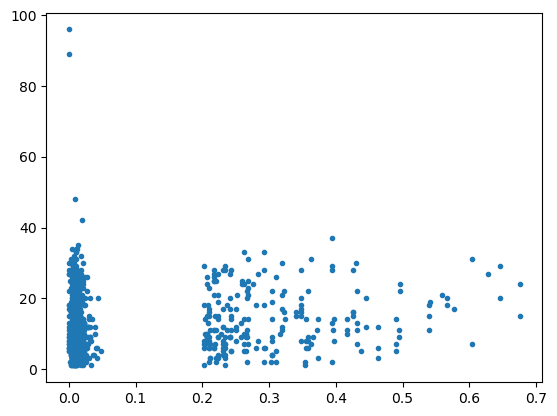

In [63]:
sdf = data[data['minXG']]
plt.figure()
plt.plot(sdf['xG'],sdf['X1'],'.')
#plt.axis([0.2,0.7,0,70])

In [56]:
model_variables = ['X1','Angle']#,'X','C']
model=''
for v in model_variables[:-1]:
    model = model  + v + ' + '
model = model + model_variables[-1]

In [57]:
test_model = smf.glm(formula="minXG ~ " + model, data=data[data['Successful']==1], 
                           family=sm.families.Binomial()).fit()
print(test_model.summary())        
b=test_model.params

                        Generalized Linear Model Regression Results                        
Dep. Variable:     ['minXG[False]', 'minXG[True]']   No. Observations:                19568
Model:                                         GLM   Df Residuals:                    19565
Model Family:                             Binomial   Df Model:                            2
Link Function:                               Logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -4535.2
Date:                             Tue, 25 Oct 2022   Deviance:                       9070.5
Time:                                     16:31:41   Pearson chi2:                 1.98e+04
No. Iterations:                                  6   Pseudo R-squ. (CS):           0.007336
Covariance Type:                         nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-